# Introduzione

Il vino, da sempre fonte di interesse e passione per enologi, appassionati e consumatori, è soggetto a un'ampia gamma di variabili che influenzano la sua qualità finale. Tra queste variabili, le caratteristiche fisico-chimiche e sensoriali del vino svolgono un ruolo fondamentale nel determinare la sua percezione e apprezzamento da parte del consumatore.

Il "Wine Quality Dataset", una raccolta di dati disponibile su Kaggle in formato CSV, offre un'opportunità unica per esplorare e analizzare le relazioni tra le variabili fisico-chimiche del vino e la qualità del prodotto finale, espressa attraverso un punteggio numerico compreso tra 0 e 10. Questo dataset contiene un'ampia gamma di variabili, tra cui l'acidità fissa, l'acidità volatile, il contenuto di alcol e molti altri, che possono influenzare la qualità del vino.

## Obiettivo del Progetto

Il presente progetto si propone di condurre un'analisi dettagliata del "Wine Quality Dataset" al fine di identificare le variabili che hanno una maggiore influenza sulla qualità del vino. Attraverso l'utilizzo di tecniche di analisi esplorativa dei dati e test statistici appropriati, cercheremo di determinare quali caratteristiche fisico-chimiche del vino sono più significativamente correlate alla qualità del prodotto finale.

## Metodologia

Inizieremo esplorando il dataset per comprendere la distribuzione delle variabili e identificare eventuali outliers o anomalie. Successivamente, utilizzeremo tecniche di visualizzazione dei dati come scatterplot, boxplot e pairplot per esplorare le relazioni tra le variabili e la qualità del vino. Inoltre, eseguiremo test statistici specifici, come il test t di Student, l'ANOVA e i test di correlazione, per valutare l'importanza delle variabili nel determinare la qualità del vino.

## Risultati Attesi

Ci aspettiamo di identificare alcune variabili chiave che hanno un'influenza significativa sulla qualità del vino, fornendo così informazioni preziose per produttori, enologi e consumatori interessati a comprendere i fattori che contribuiscono alla produzione di vini di alta qualità.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file = pd.read_csv()

In [ ]:
df = file.copy()

In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
# Pulizia del dataset

df.duplicated().sum()

In [ ]:
df.isnull().sum()

In [ ]:
df = df.drop(columns = 'Id')

## Analisi Univariata

In [ ]:
# Creazione Histogrammi per visualizzare la distribuzione dei valori per ogni variabile

colonne = df.columns

for c in colonne:
  df[c].plot(kind = 'hist', lw=0.3)
  plt.title(c)
  plt.show()


In [ ]:
# Analisi Univariata per trovare gli outliars per ogni variabile

for c in colonne:
  df[c].plot(kind='box')
  plt.title(c)
  plt.show()

### Gestione degli outliars
Per non rimuovere gli outliars ho deciso di procedere con la tecnica del 'capping', ossia impostare tutti i valori degli outlier che superano una certa soglia (z_score) al valore della soglia stessa.

In [ ]:
from scipy import stats

z_scores = stats.zscore(df)
soglia_zscore = 2
righe_con_outlier = (np.abs(z_scores) > soglia_zscore).any(axis=1)

# Clipping degli outlier al limite della soglia
df_clipped = df.copy()
df_clipped[righe_con_outlier] = df_clipped[righe_con_outlier].clip(df_clipped[righe_con_outlier].quantile(0.025),
                                                                   df_clipped[righe_con_outlier].quantile(0.975),
                                                                   axis=1)

### Analisi e Definizione degli outliars
Lo Z-score, anche noto come punteggio standardizzato, è una misura che indica quanti deviazioni standard un punto dati è distante dalla media in un insieme di dati. È utile per valutare quanto un valore specifico sia lontano o vicino rispetto alla media di un insieme di dati e per confrontare punti dati provenienti da distribuzioni diverse.

In [ ]:
df_clean = df_clipped.copy()

In [ ]:
for c in colonne:
  df_clean[c].plot(kind='box')
  plt.title(c)
  plt.show()

Ora df_clean contiene valori normalizzati, il che aiuta le prossime fasi dell'analisi.
Analisi di regressione Multivariata, Correlazioni e Test d'Ipotesi

## Analisi di Regressione Multivariata
Questo tipo di analisi viene utilizzato per studiare le relazioni tra una variabile dipendente e più variabili indipendenti contemporaneamente. L'obiettivo è quello di determinare come le variabili indipendenti influenzano la variabile dipendente e di stimare i loro effetti.

<Figure size 5000x5000 with 0 Axes>

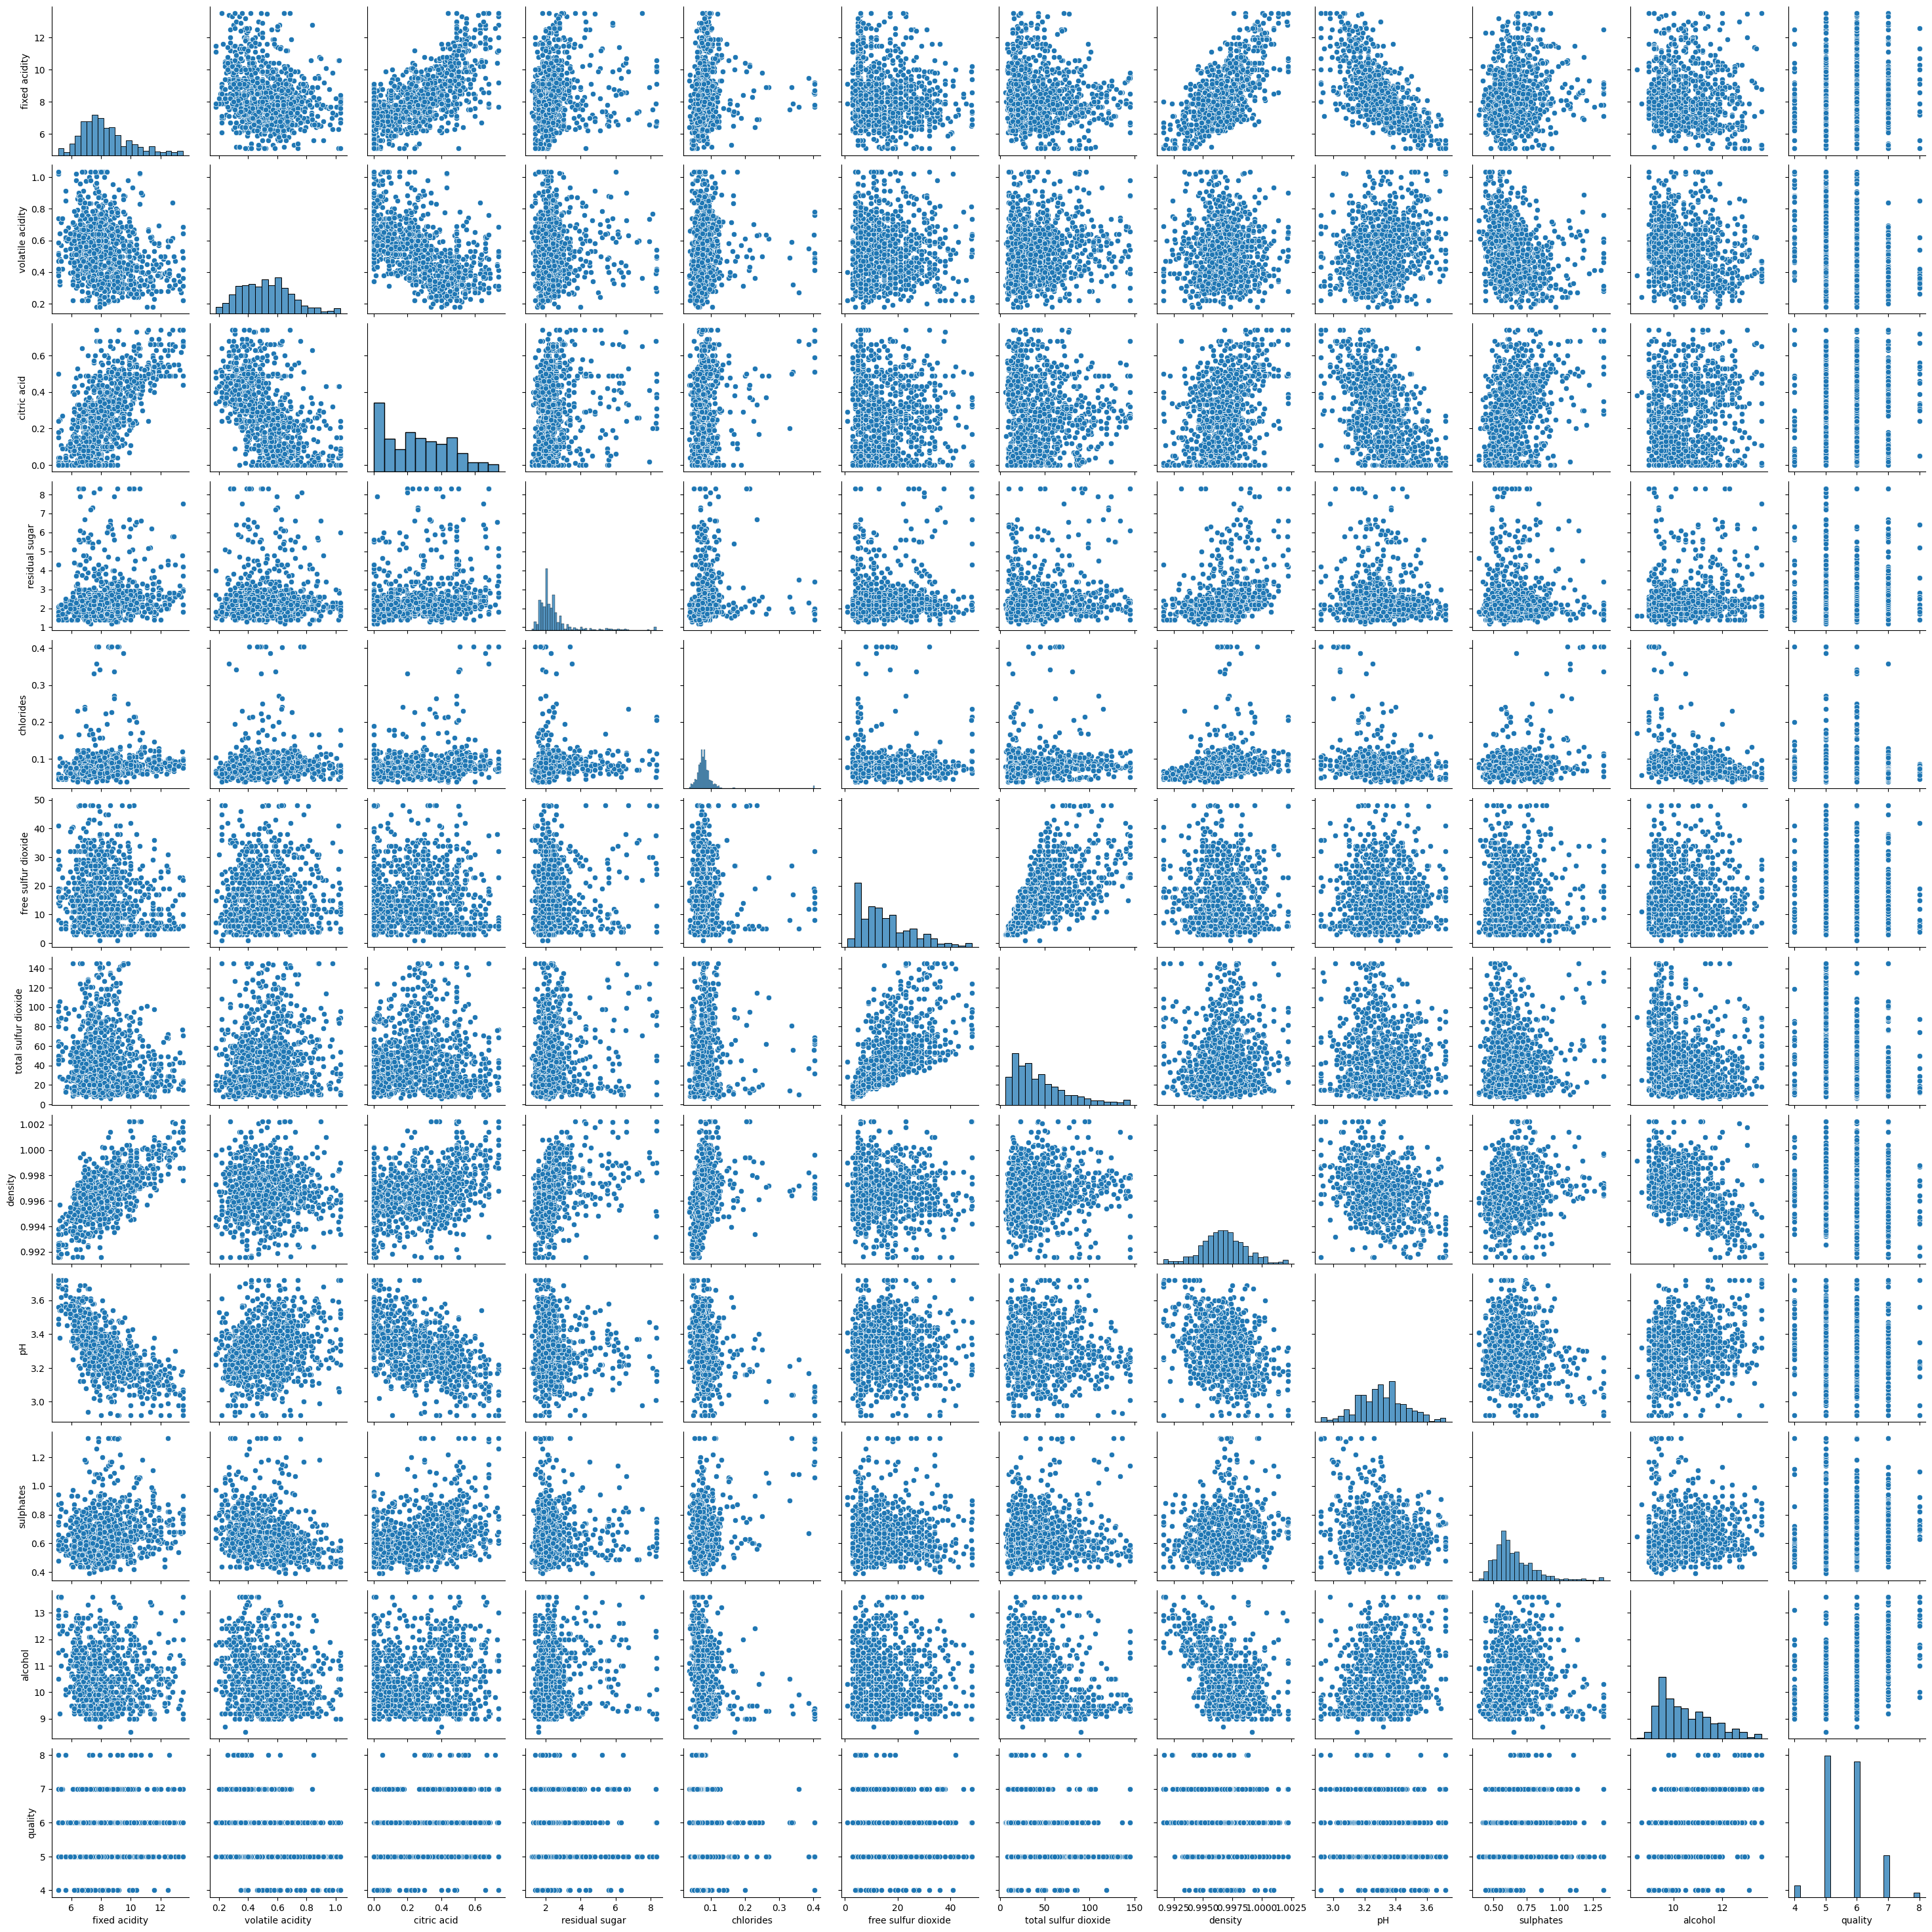

In [ ]:
plt.figure(figsize=(50,50))
sns.pairplot(df_clean)
plt.show()

## Analisi delle Correlazioni

In [ ]:
df_clean.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.260168,0.680503,0.170592,0.117876,-0.166525,-0.113427,0.684622,-0.690705,0.186169,-0.078875,0.125561
volatile acidity,-0.260168,1.000000,-0.552884,0.006162,0.061823,0.002237,0.100955,0.014598,0.221183,-0.295304,-0.210732,-0.401676
citric acid,0.680503,-0.552884,1.000000,0.188758,0.230161,-0.057617,0.020692,0.378547,-0.548177,0.339108,0.109989,0.246748
residual sugar,0.170592,0.006162,0.188758,1.000000,0.055866,0.133075,0.179919,0.367534,-0.110520,0.014750,0.098272,0.033967
chlorides,0.117876,0.061823,0.230161,0.055866,1.000000,0.006056,0.060364,0.215868,-0.271966,0.343899,-0.238822,-0.119619
free sulfur dioxide,-0.166525,0.002237,-0.057617,0.133075,0.006056,1.000000,0.675869,-0.061272,0.075019,0.027836,-0.046413,-0.068018
total sulfur dioxide,-0.113427,0.100955,0.020692,0.179919,0.060364,0.675869,1.000000,0.072495,-0.048121,0.009442,-0.214329,-0.212878
density,0.684622,0.014598,0.378547,0.367534,0.215868,-0.061272,0.072495,1.000000,-0.349970,0.145041,-0.495425,-0.175572
pH,-0.690705,0.221183,-0.548177,-0.110520,-0.271966,0.075019,-0.048121,-0.349970,1.000000,-0.161447,0.215884,-0.054373
sulphates,0.186169,-0.295304,0.339108,0.014750,0.343899,0.027836,0.009442,0.145041,-0.161447,1.000000,0.114889,0.287455


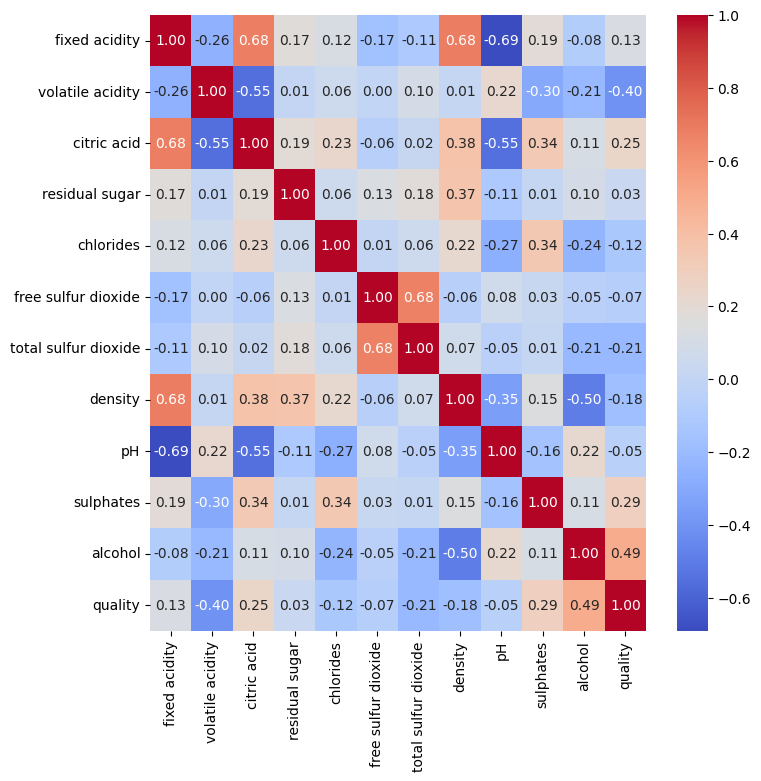

In [ ]:
# Visualizzazione correlazoni

plt.figure(figsize=(8,8))
sns.heatmap(df_clean.corr(), cmap='coolwarm', cbar=True, fmt='.2f', annot=True)
plt.show()

## Test d'ipotesi

### TTest
Test t di Student: Utilizzato per confrontare le medie di due campioni indipendenti e determinare se ci sono differenze significative tra di esse. Il t_stat indica la dimensione dell'effetto, mentre il p-value indica la probabilità che tale effetto sia dovuto al caso. Entrambi sono importanti per determinare la significatività di un risultato nel contesto di un Ttest.
Per eseguire questo test ho considerato solamente le variabili che mostravano una correlazione +-0.18.
Con questo Test mi aspetto di ottenere dei risultati più chiari per comprendere la significatività statistica delle variabili prese in considerazione rispetto alla variabile target.

Variabile in esame: volatile acidity
Statistiche t: 213.69898687713697
Valore p: 0.0
Valore statisticamente significativo. Posso respingere l'ipotesi nulla 



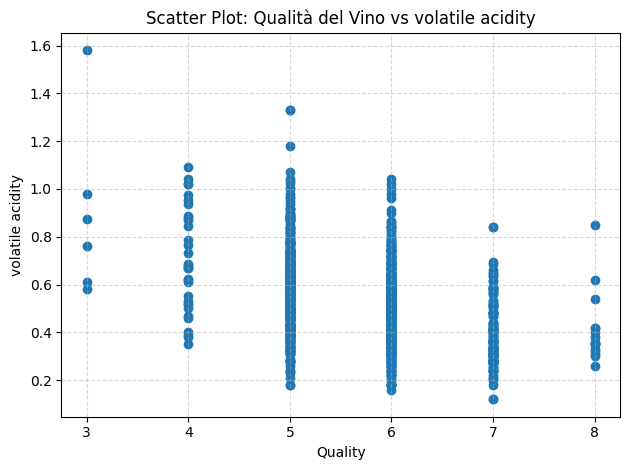

Variabile in esame: citric acid
Statistiche t: 223.56560586435074
Valore p: 0.0
Valore statisticamente significativo. Posso respingere l'ipotesi nulla 



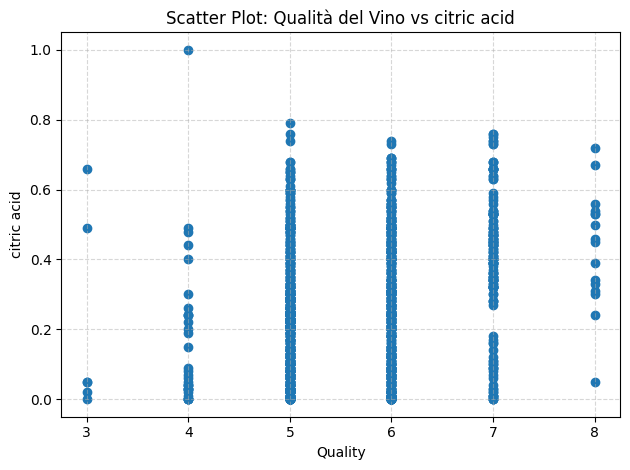

Variabile in esame: total sulfur dioxide
Statistiche t: -41.50029665167029
Valore p: 5.0893238942090414e-281
Valore statisticamente significativo. Posso respingere l'ipotesi nulla 



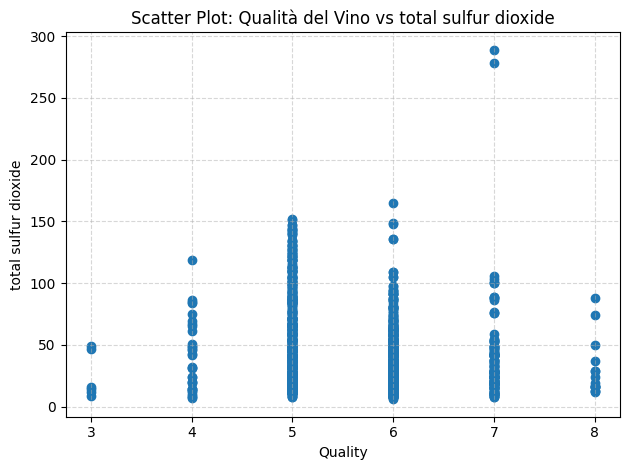

Variabile in esame: density
Statistiche t: 199.2553868798686
Valore p: 0.0
Valore statisticamente significativo. Posso respingere l'ipotesi nulla 



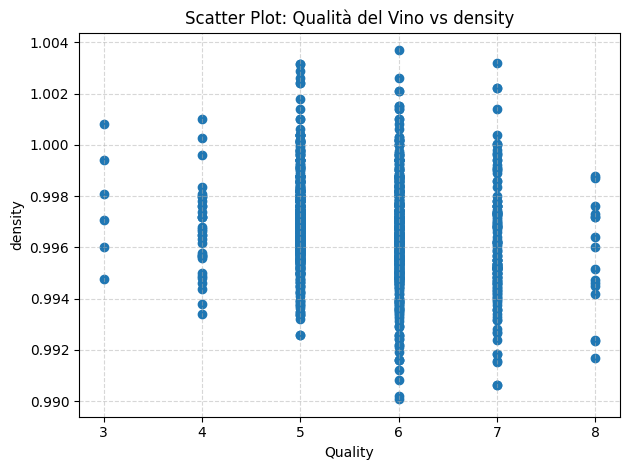

Variabile in esame: sulphates
Statistiche t: 208.94896714344407
Valore p: 0.0
Valore statisticamente significativo. Posso respingere l'ipotesi nulla 



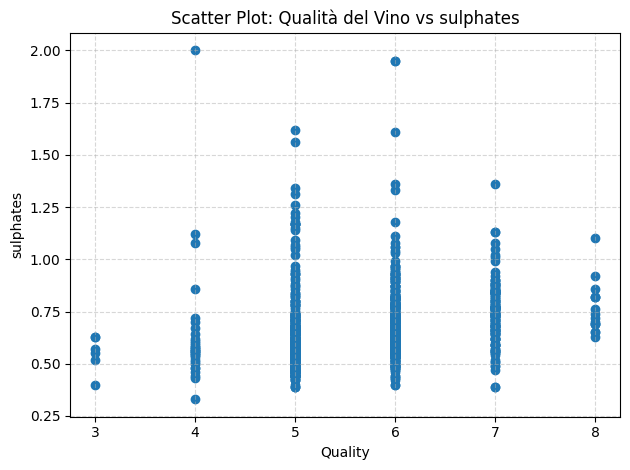

Variabile in esame: alcohol
Statistiche t: -120.52110564515583
Valore p: 0.0
Valore statisticamente significativo. Posso respingere l'ipotesi nulla 



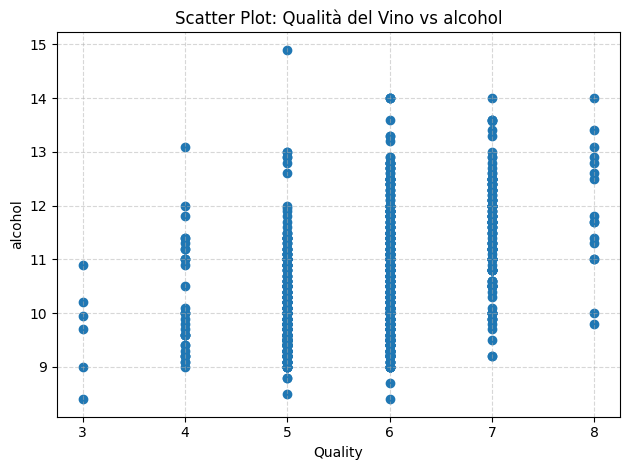

In [ ]:
from scipy.stats import ttest_ind

variabili_considerate = ['volatile acidity', 'citric acid',
                         'total sulfur dioxide', 'density', 'sulphates', 'alcohol']

### Correzione di Bonferroni
alpha = 0.05  # Soglia alpha originale
numero_test = len(df.columns) - 1  # Numero di test effettuati (escludendo la variabile target 'quality')

alpha_corretto = alpha / numero_test  # Applicazione della correzione di Bonferroni

for c in variabili_considerate:
  if c != 'quality':
    t_stat, p_value = ttest_ind(df_clean['quality'], df[c])

    print("Variabile in esame:", c)
    print("Statistiche t:", t_stat)
    print("Valore p:", p_value)

    if round(p_value, 10) < 0.05:
      print("Valore statisticamente significativo. Posso respingere l'ipotesi nulla", '\n')
    else:
      print("Il valore non è statisticamente significativo. Non posso respingere l'ipotesi nulla", '\n')

    plt.scatter(df['quality'], df[c])
    plt.title(f'Scatter Plot: Qualità del Vino vs {c}')
    plt.xlabel('Quality')
    plt.ylabel(c)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Conclusione:
L'analisi condotta ha rivelato risultati significativi per tutte le variabili esaminate. Questo suggerisce che le caratteristiche chimiche e organolettiche dei vini nel dataset hanno un impatto sostanziale sulla qualità generale del prodotto. Tuttavia, è importante notare che il dataset non fornisce informazioni specifiche sul tipo di uva o sul terreno di coltivazione, limitando la nostra comprensione delle influenze ambientali sulla qualità del vino. Nonostante ciò, la forte evidenza statistica ottenuta supporta l'importanza di considerare attentamente queste variabili nella produzione vinicola per garantire un prodotto di alta qualità.